# Detrended Oscillator

https://www.linnsoft.com/techind/detrended-oscillator-dtrend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461617,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106262,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207157,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777870,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069557,158066000


In [3]:
# Parameters
ma1_window = 20
ma2_window = 10

# Calculate MA1
df['MA1'] = df['Close'].rolling(window=ma1_window).mean()

# Calculate PRICE - MA1(PRICE)
df['Price_Minus_MA1'] = df['Close'] - df['MA1']

# Calculate MA2 of the result
df['Detrended_Oscillator'] = df['Price_Minus_MA1'].rolling(window=ma2_window).mean()

# Drop NaN values
df.dropna(inplace=True)


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA1,Price_Minus_MA1,Detrended_Oscillator
Date,,,,,,,,,
2018-10-12,55.105000,55.720001,54.209999,55.527500,52.971062,161351600,55.634000,-0.106500,0.401062
2018-10-15,55.290001,55.457500,54.317501,54.340000,51.838242,123164000,55.627500,-1.287500,0.149137
2018-10-16,54.732498,55.747501,54.189999,55.537498,52.980579,116736000,55.676375,-0.138876,-0.037275
2018-10-17,55.575001,55.660000,54.834999,55.297501,52.751644,91541600,55.711625,-0.414124,-0.314463
2018-10-18,54.465000,54.935001,53.250000,54.005001,51.518650,130325200,55.661500,-1.656499,-0.607775


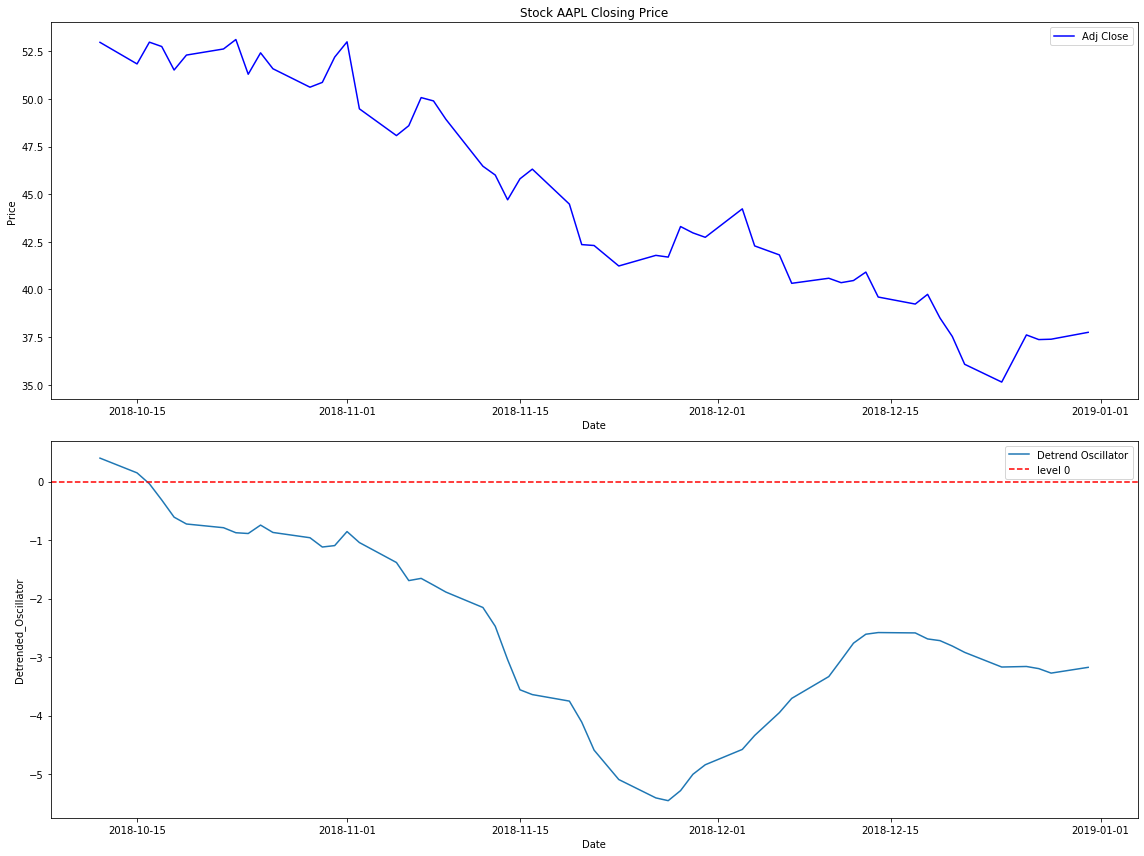

In [5]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'], label='Adj Close', color='blue')
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Detrended_Oscillator'], label='Detrend Oscillator')
ax2.axhline(y=0, color='r', linestyle='--', label='level 0')
ax2.set_ylabel('Detrended_Oscillator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

## Candlestick with Detrended Oscillator

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA1,Price_Minus_MA1,Detrended_Oscillator,VolumePositive
0,736979.0,55.105000,55.720001,54.209999,55.527500,52.971062,161351600,55.634000,-0.106500,0.401062,False
1,736982.0,55.290001,55.457500,54.317501,54.340000,51.838242,123164000,55.627500,-1.287500,0.149137,False
2,736983.0,54.732498,55.747501,54.189999,55.537498,52.980579,116736000,55.676375,-0.138876,-0.037275,False
3,736984.0,55.575001,55.660000,54.834999,55.297501,52.751644,91541600,55.711625,-0.414124,-0.314463,False
4,736985.0,54.465000,54.935001,53.250000,54.005001,51.518650,130325200,55.661500,-1.656499,-0.607775,False


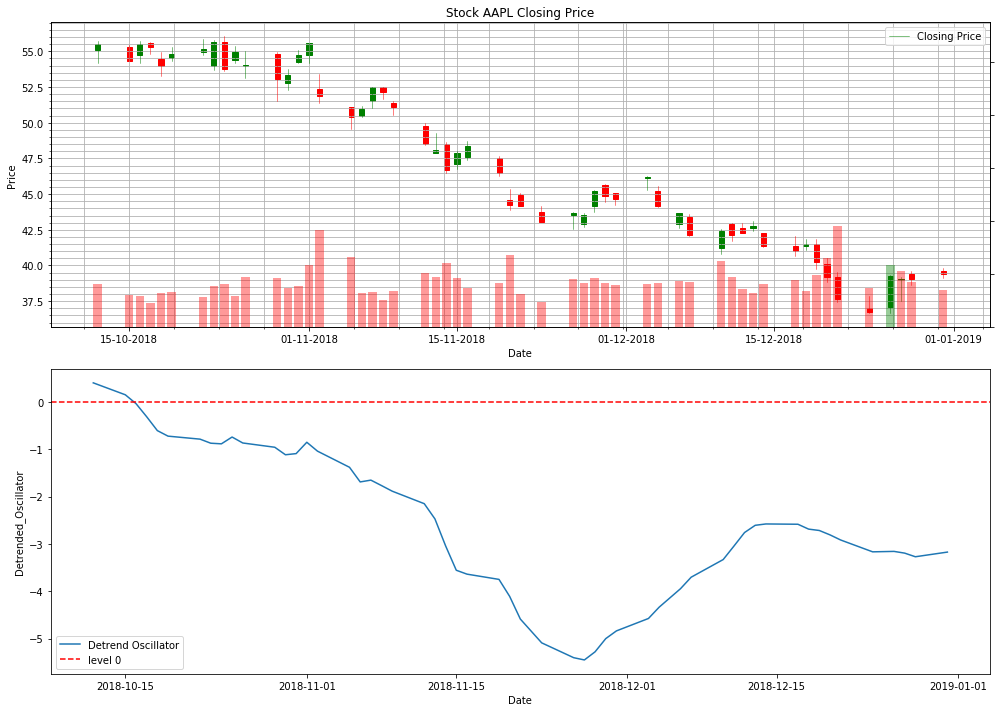

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc.Volume.max())
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(['Closing Price'], loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Detrended_Oscillator'], label='Detrend Oscillator')
ax2.axhline(y=0, color='r', linestyle='--', label='level 0')
ax2.set_ylabel('Detrended_Oscillator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

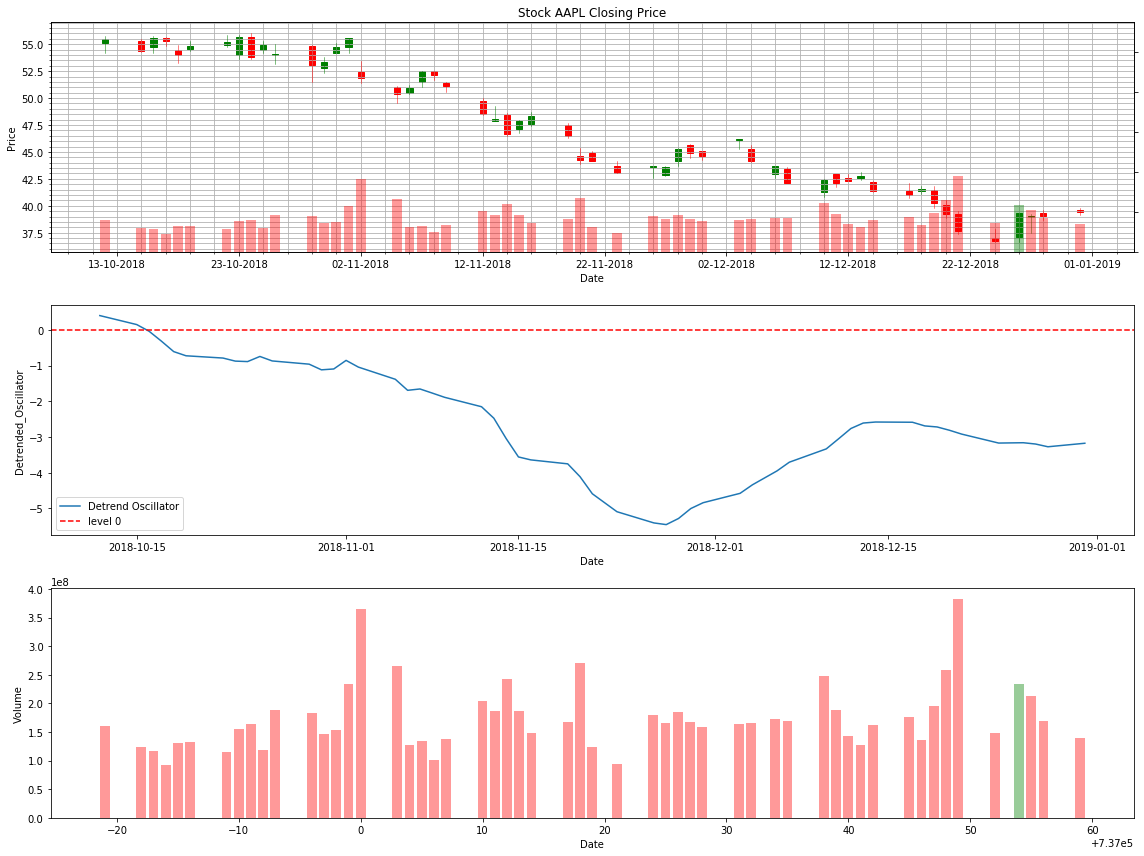

In [8]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['Detrended_Oscillator'], label='Detrend Oscillator')
ax2.axhline(y=0, color='r', linestyle='--', label='level 0')
ax2.set_ylabel('Detrended_Oscillator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax3.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.set_xlabel('Date')

plt.tight_layout()
plt.show()